
# 🧪 t-test & ANOVA

**데이터톤/현업에서 자주 쓰이는 평균 비교 검정 실습**

- **독립표본 t-test (Independent samples t-test, Welch’s t-test)**: 두 그룹 평균 비교 (예: 남/여 점수)
- **대응표본 t-test (Paired samples t-test, Dependent samples t-test)**: 같은 집단의 전/후 비교 (예: 교육 전/후 점수)
- **일원 ANOVA (One-way ANOVA)**: 3개 이상 그룹 평균 비교 (예: 지역 A/B/C 평균 비교)
- (옵션) **사후(pairwise) 비교**: 어느 그룹끼리 다른지 추가 확인 (보퍼로니 보정)


In [1]:

import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(42)
pd.set_option('display.float_format', lambda x: f'{x:,.3f}')



## 1. 예제 데이터 만들기
- `group_A` vs `group_B`: **독립표본 t-test**
- `pre` vs `post`: **대응표본 t-test**
- `region_A/B/C`: **ANOVA**


In [2]:

# 독립표본 t-test
n_A, n_B = 120, 110
group_A = np.random.normal(loc=70, scale=10, size=n_A)
group_B = np.random.normal(loc=73, scale=10, size=n_B)

# 대응표본 t-test
n_prepost = 80
pre  = np.random.normal(loc=65, scale=8, size=n_prepost)
improvement = np.random.normal(loc=5, scale=3, size=n_prepost)
post = pre + improvement

# ANOVA (3그룹)
nA, nB, nC = 60, 65, 70
region_A = np.random.normal(loc=68, scale=9, size=nA)
region_B = np.random.normal(loc=72, scale=9, size=nB)
region_C = np.random.normal(loc=70, scale=9, size=nC)

df = pd.DataFrame({
    'group_A': pd.Series(group_A),
    'group_B': pd.Series(group_B),
    'pre': pd.Series(pre),
    'post': pd.Series(post),
    'region_A': pd.Series(region_A),
    'region_B': pd.Series(region_B),
    'region_C': pd.Series(region_C),
})
df.describe()


,group_A,group_B,pre,post,region_A,region_B,region_C
count,120.000,110.000,80.000,80.000,60.000,65.000,70.000
mean,69.208,73.810,65.002,70.302,67.871,71.163,69.077
std,9.253,10.072,8.048,8.646,9.826,9.141,8.988
min,43.803,54.327,39.070,44.805,49.393,51.283,47.755
25%,64.281,65.194,59.784,63.893,59.485,64.521,64.061
50%,69.268,74.994,65.223,70.483,68.235,70.011,70.296
75%,73.828,79.738,70.128,75.127,74.418,76.850,75.074
max,94.632,111.527,82.152,91.068,86.547,99.710,90.436



## 2. 빠른 시각화 (박스플롯)


/var/folders/hf/ndbx766s1wz64f0tzx4x6fb40000gn/T/ipykernel_36474/4196374454.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([group_A, group_B], labels=['Group A', 'Group B'])


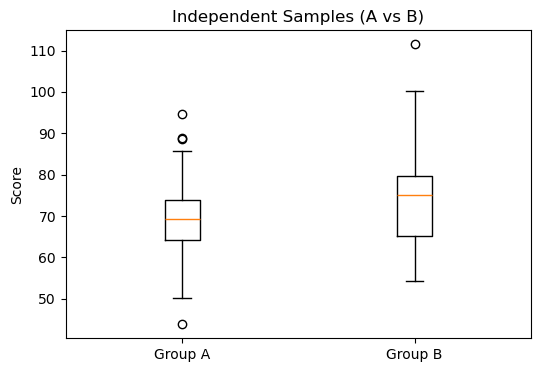

/var/folders/hf/ndbx766s1wz64f0tzx4x6fb40000gn/T/ipykernel_36474/4196374454.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([pre, post], labels=['Pre', 'Post'])


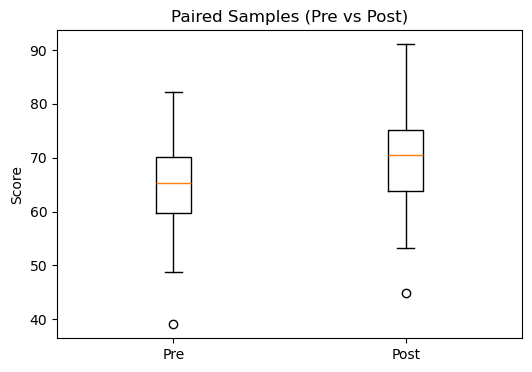

/var/folders/hf/ndbx766s1wz64f0tzx4x6fb40000gn/T/ipykernel_36474/4196374454.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([region_A, region_B, region_C], labels=['Region A', 'Region B', 'Region C'])


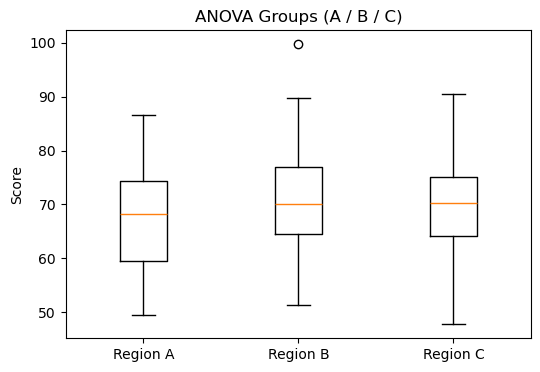

In [3]:

plt.figure(figsize=(6,4))
plt.boxplot([group_A, group_B], labels=['Group A', 'Group B'])
plt.title('Independent Samples (A vs B)')
plt.ylabel('Score')
plt.show()

plt.figure(figsize=(6,4))
plt.boxplot([pre, post], labels=['Pre', 'Post'])
plt.title('Paired Samples (Pre vs Post)')
plt.ylabel('Score')
plt.show()

plt.figure(figsize=(6,4))
plt.boxplot([region_A, region_B, region_C], labels=['Region A', 'Region B', 'Region C'])
plt.title('ANOVA Groups (A / B / C)')
plt.ylabel('Score')
plt.show()



## 3. p-value 해석 헬퍼


In [4]:

def interpret_p(p, alpha=0.05):
    if p < alpha:
        return f"p = {p:.4f} (< {alpha}) → **유의함**: 평균 차이가 **있다**고 볼 수 있습니다."
    else:
        return f"p = {p:.4f} (>= {alpha}) → **유의하지 않음**: 평균 차이가 **있다고 보기 어렵습니다**."



## 4. 독립표본 t-test (Independent samples t-test 또는 Welch’s t-test)


In [5]:

t_stat, p_val = stats.ttest_ind(group_A, group_B, equal_var=False)
print(f"t-statistic: {t_stat:.3f}, p-value: {p_val:.6f}")
print(interpret_p(p_val))


t-statistic: -3.598, p-value: 0.000395
p = 0.0004 (< 0.05) → **유의함**: 평균 차이가 **있다**고 볼 수 있습니다.



## 5. 대응표본 t-test (Paired samples t-test 또는 Dependent samples t-test)


In [6]:

t_stat_p, p_val_p = stats.ttest_rel(pre, post)
print(f"t-statistic: {t_stat_p:.3f}, p-value: {p_val_p:.6f}")
print(interpret_p(p_val_p))


t-statistic: -18.227, p-value: 0.000000
p = 0.0000 (< 0.05) → **유의함**: 평균 차이가 **있다**고 볼 수 있습니다.



## 6. 일원 ANOVA (One-way ANOVA)


In [7]:

F_stat, p_val_anova = stats.f_oneway(region_A, region_B, region_C)
print(f"F-statistic: {F_stat:.3f}, p-value: {p_val_anova:.6f}")
print(interpret_p(p_val_anova))


F-statistic: 2.020, p-value: 0.135491
p = 0.1355 (>= 0.05) → **유의하지 않음**: 평균 차이가 **있다고 보기 어렵습니다**.



### (옵션) 사후 비교 (Bonferroni 보정)


In [8]:

from itertools import combinations
groups = {'Region A': region_A, 'Region B': region_B, 'Region C': region_C}
pairs = list(combinations(groups.keys(), 2))
m = len(pairs)

rows = []
for g1, g2 in pairs:
    t_stat, p = stats.ttest_ind(groups[g1], groups[g2], equal_var=False)
    p_adj = min(p * m, 1.0)
    rows.append({'pair': f'{g1} vs {g2}', 't_stat': t_stat, 'p_raw': p, 'p_bonf': p_adj})
pd.DataFrame(rows)


,pair,t_stat,p_raw,p_bonf
0,Region A vs Region B,-1.935,0.055,0.166
1,Region A vs Region C,-0.725,0.470,1.000
2,Region B vs Region C,1.336,0.184,0.552



## 7. 리포트 문장 예시
- A vs B: “Welch t-test 결과 유의(p<0.05) → 평균 차이 존재”
- Pre vs Post: “paired t-test 결과 유의 → 교육 효과 존재”
- ANOVA: “집단 간 평균 차이 유의 → 사후 비교에서 B가 A보다 높음 등”
